# Import Libraries

In [2]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pickle
from lib_file import lib_path
from sklearn.model_selection import train_test_split
from sklearn.utils import resample

import os
for dirname, _, filenames in os.walk("input"):
    for filename in filenames:
        print(os.path.join(dirname, filename))

input\heart.csv


# Data Loading

In [72]:
df = pd.read_csv("input/heart.csv")

In [28]:
df.shape

(303, 14)

In [29]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [30]:
df.nunique()

age          41
sex           2
cp            4
trestbps     49
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            5
thal          4
target        2
dtype: int64

In [31]:
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [32]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [75]:
#check for duplicate rows 
df.duplicated().any()
print("No duplicate values")

No duplicate values


In [70]:
numerical_features = df.select_dtypes(include=[np.number]).columns.tolist()

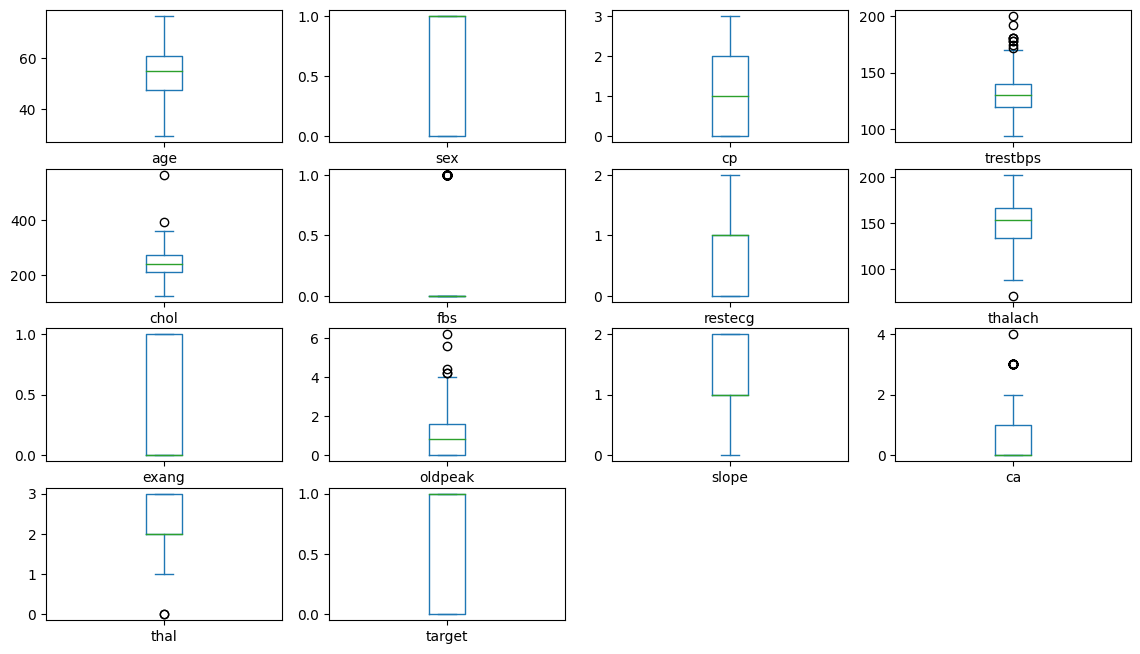

Column: age
Number of outliers (Z-score method): 0


Column: sex
Number of outliers (Z-score method): 0


Column: cp
Number of outliers (Z-score method): 0


Column: trestbps
Number of outliers (Z-score method): 2
Outlier values:
[200 192]


Column: chol
Number of outliers (Z-score method): 2
Outlier values:
[564 394]


Column: fbs
Number of outliers (Z-score method): 0


Column: restecg
Number of outliers (Z-score method): 0


Column: thalach
Number of outliers (Z-score method): 1
Outlier values:
[71]


Column: exang
Number of outliers (Z-score method): 0


Column: oldpeak
Number of outliers (Z-score method): 2
Outlier values:
[6.2 5.6]


Column: slope
Number of outliers (Z-score method): 0


Column: ca
Number of outliers (Z-score method): 1
Outlier values:
[4]


Column: thal
Number of outliers (Z-score method): 2
Outlier values:
[0 0]


Column: target
Number of outliers (Z-score method): 0




In [74]:
df.plot(kind = "box" , subplots = True , figsize = (14,10) , layout = (5,4))
plt.show()
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

num_subplots = df.shape[1]

for i in range(num_subplots):
    column_name = df.columns[i]
    column_data = df.iloc[:, i]
    
    z_scores = stats.zscore(column_data)
    threshold = 3
    outliers = column_data[abs(z_scores) > threshold]
    num_outliers = len(outliers)
    
    print(f"Column: {column_name}")
    print(f"Number of outliers (Z-score method): {num_outliers}")
    if num_outliers > 0:
        print("Outlier values:")
        print(outliers.values)
    print("\n")



# Exploratory Data Analysis (EDA)

In [6]:
df_copy = df.copy(deep=True)

df_copy.target=df_copy.target.map({1:'Yes', 0:'No'})
df_copy.sex= df_copy.sex.map({1:'Male',0:'Female'})
df_copy.cp= df_copy.cp.map({0:'Normal',1:'Atypical Angina',2:'Non Anginal Pain', 3:'Asymptotic'})
df_copy.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,Male,Asymptotic,145,233,1,0,150,0,2.3,0,0,1,Yes
1,37,Male,Non Anginal Pain,130,250,0,1,187,0,3.5,0,0,2,Yes
2,41,Female,Atypical Angina,130,204,0,0,172,0,1.4,2,0,2,Yes
3,56,Male,Atypical Angina,120,236,0,1,178,0,0.8,2,0,2,Yes
4,57,Female,Normal,120,354,0,1,163,1,0.6,2,0,2,Yes


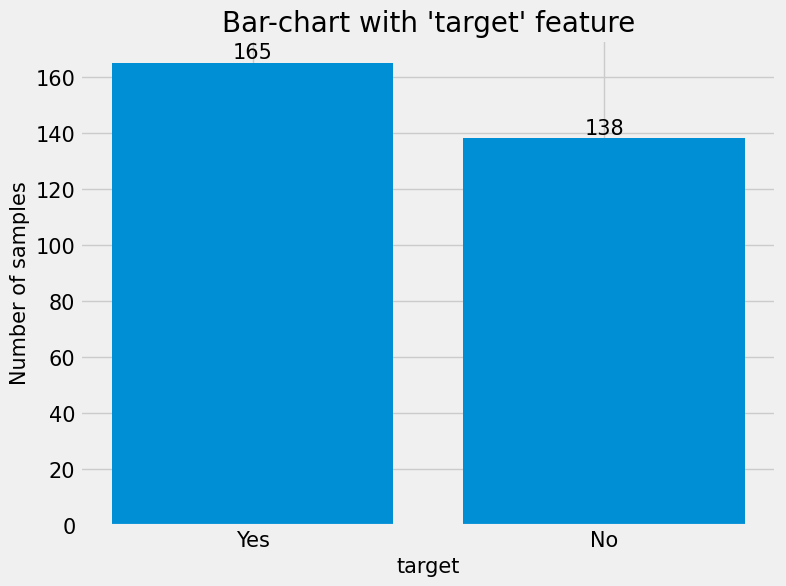

In [7]:
chart_data = dict(df_copy['target'].value_counts())
with plt.style.context(style="fivethirtyeight"):
    plt.figure(figsize=(8,6))
    plt.rcParams['font.size'] = 15
    plt.bar(x=list(chart_data.keys()),
           height=list(chart_data.values()))
    plt.title(label="Bar-chart with 'target' feature", fontsize=20)
    plt.xlabel(xlabel="target", fontsize=15)
    plt.ylabel(ylabel="Number of samples", fontsize=15)
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    for x, y in zip(chart_data.keys(), chart_data.values()):
        plt.text(x, y, str(y), ha='center', va='bottom')
    plt.show()

**Feature : age**

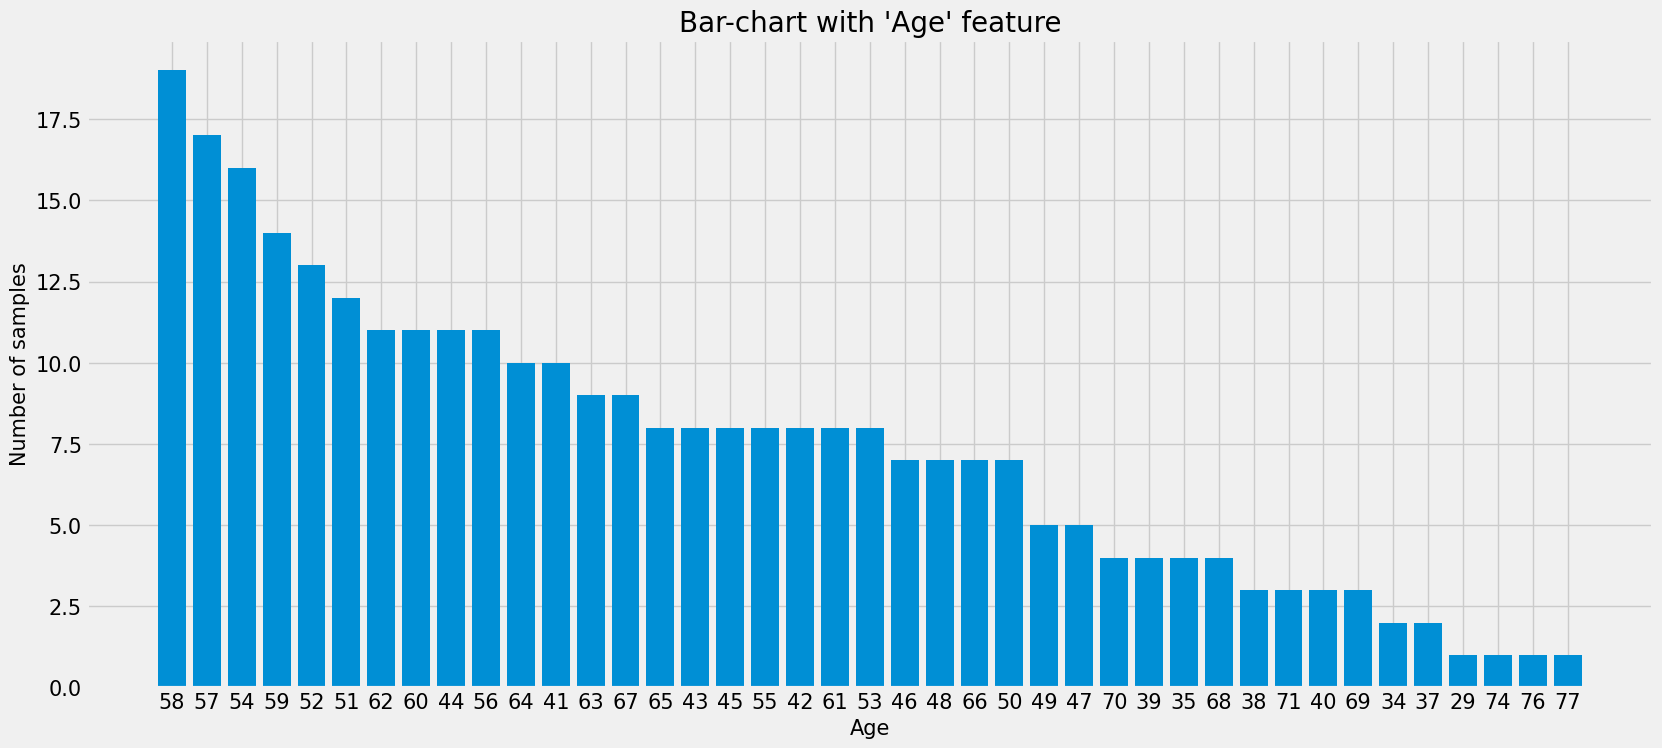

In [8]:
chart_data = dict(df_copy['age'].value_counts())
with plt.style.context(style="fivethirtyeight"):
    plt.figure(figsize=(18,8))
    plt.rcParams['font.size'] = 15
    bars = plt.bar(x=[str(age) for age in list(chart_data.keys())],
           height=list(chart_data.values()))
    plt.title(label="Bar-chart with 'Age' feature", fontsize=20)
    plt.xlabel(xlabel="Age", fontsize=15)
    plt.ylabel(ylabel="Number of samples", fontsize=15)
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    plt.show()

In [9]:
print(f"Minimum Age: {df_copy['age'].min()} | Maximum Age: {df_copy['age'].max()}")

Minimum Age: 29 | Maximum Age: 77


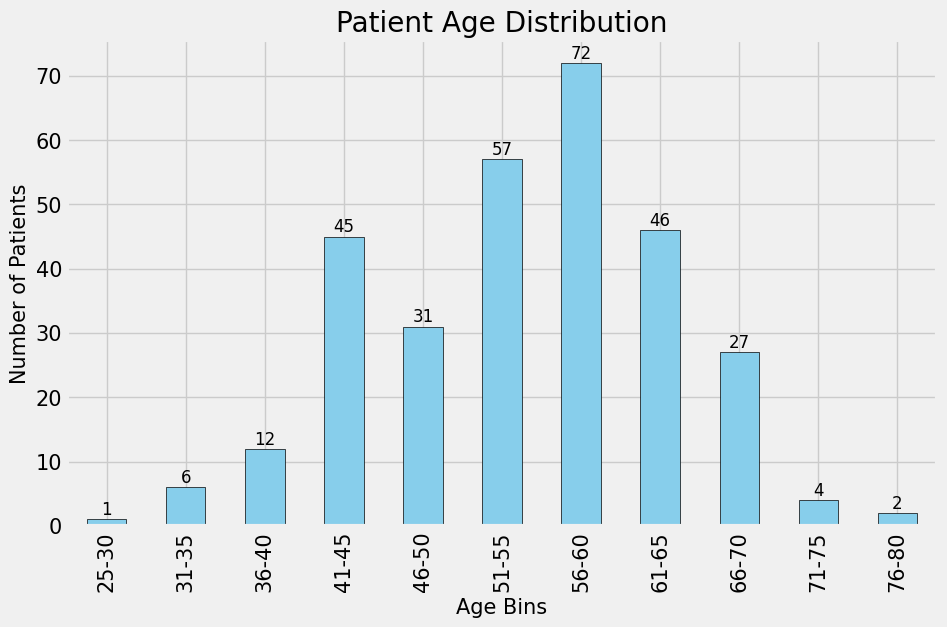

In [10]:
bins = [25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80]
bin_labels = ['25-30', '31-35', '36-40', '41-45', '46-50', '51-55', '56-60', '61-65', '66-70', '71-75', '76-80']
df_copy['age_bins'] = pd.cut(df_copy['age'], bins=bins, labels=bin_labels, include_lowest=True)
age_counts = df_copy['age_bins'].value_counts()

with plt.style.context(style="fivethirtyeight"):
    plt.figure(figsize=(10,6))
    ax = age_counts.sort_index().plot(kind='bar', color='skyblue', edgecolor='black')
    
    plt.title('Patient Age Distribution')
    plt.xlabel('Age Bins', fontsize=15)
    plt.ylabel('Number of Patients', fontsize=15)
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    
    for i, v in enumerate(age_counts.sort_index()):
        ax.text(i, v + 0.1, str(v), ha='center', va='bottom', fontsize=12)

    plt.show()

In [11]:
df_copy.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,age_bins
0,63,Male,Asymptotic,145,233,1,0,150,0,2.3,0,0,1,Yes,61-65
1,37,Male,Non Anginal Pain,130,250,0,1,187,0,3.5,0,0,2,Yes,36-40
2,41,Female,Atypical Angina,130,204,0,0,172,0,1.4,2,0,2,Yes,41-45
3,56,Male,Atypical Angina,120,236,0,1,178,0,0.8,2,0,2,Yes,56-60
4,57,Female,Normal,120,354,0,1,163,1,0.6,2,0,2,Yes,56-60


ValueError: cannot convert float NaN to integer

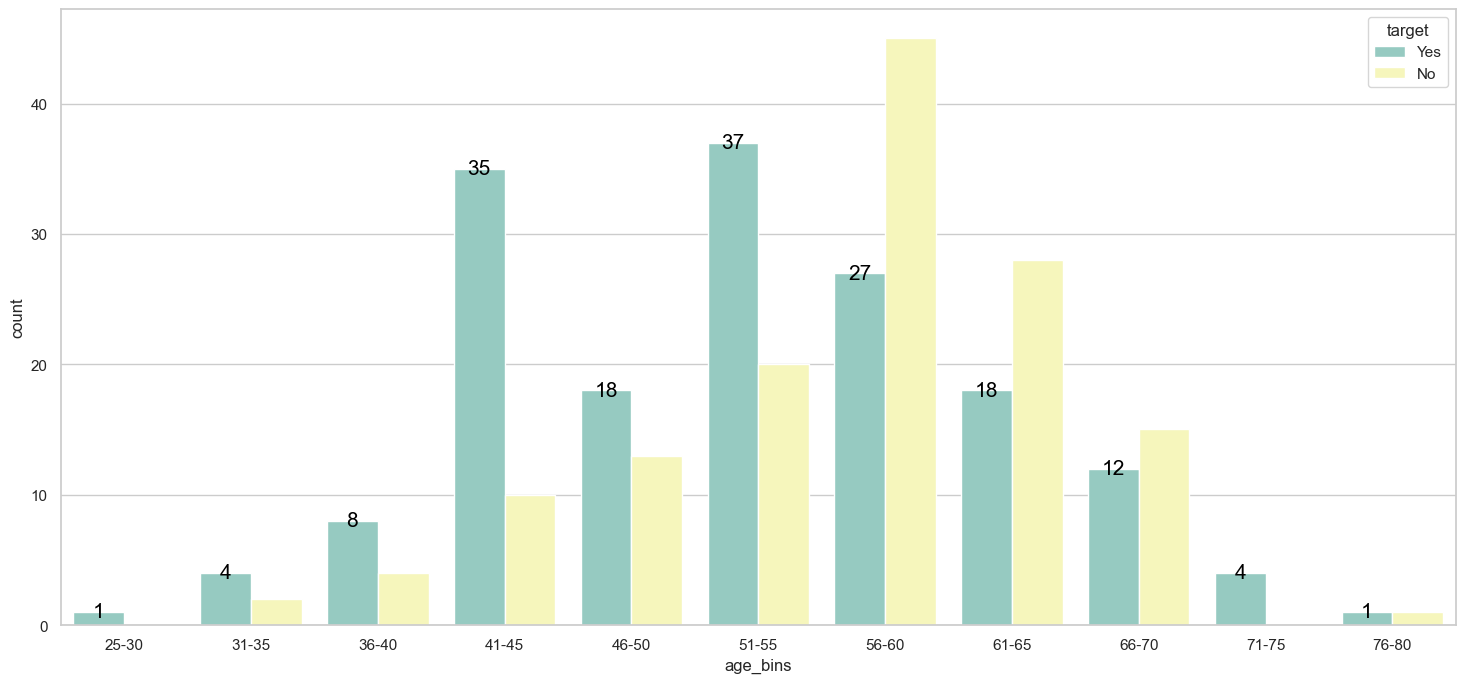

In [12]:
chart_df = df_copy[['age_bins', 'target']]
plt.figure(figsize=(18, 8))
sns.set(style="whitegrid")
sns.countplot(data=chart_df, x="age_bins", hue="target", palette="Set3")
ax = plt.gca()
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=15, color='black')
plt.title("Comparison of 'age_bins' and 'target'", fontsize=20)
plt.xlabel("Age Bins", fontsize=15)
plt.ylabel("Number of samples", fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(loc='upper right', fontsize=15)
plt.show()

**Feature : sex**

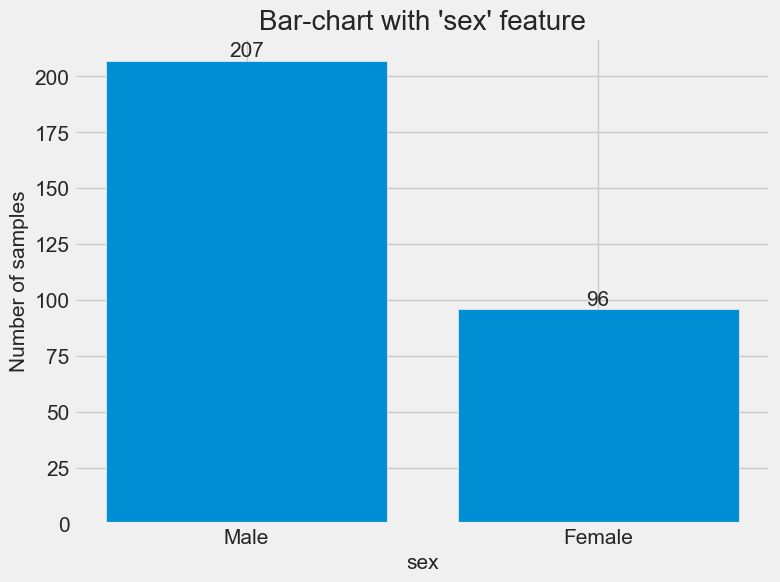

In [13]:
chart_data = dict(df_copy['sex'].value_counts())
with plt.style.context(style="fivethirtyeight"):
    plt.figure(figsize=(8,6))
    plt.rcParams['font.size'] = 15
    plt.bar(x=list(chart_data.keys()),
           height=list(chart_data.values()))
    plt.title(label="Bar-chart with 'sex' feature", fontsize=20)
    plt.xlabel(xlabel="sex", fontsize=15)
    plt.ylabel(ylabel="Number of samples", fontsize=15)
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    for x, y in zip(chart_data.keys(), chart_data.values()):
        plt.text(x, y, str(y), ha='center', va='bottom')
    plt.show()

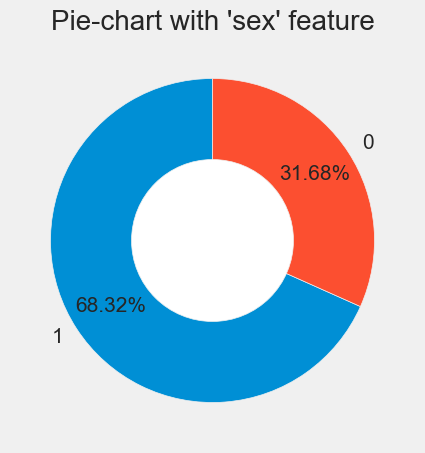

In [14]:
chart_data = dict(df['sex'].value_counts())
with plt.style.context(style="fivethirtyeight"):
    plt.figure(figsize=(8,5))
    plt.rcParams['font.size'] = 10
    plt.pie(labels=list(chart_data.keys()),
           x=list(chart_data.values()),
           autopct="%.2f%%",
           startangle=90,
           textprops={'fontsize': 15},
           pctdistance=0.75)
    centre_circle = plt.Circle((0, 0), 0.50, fc='white')
    fig = plt.gcf()
    fig.gca().add_artist(centre_circle)
    plt.title(label="Pie-chart with 'sex' feature", fontsize=20)
    plt.show()

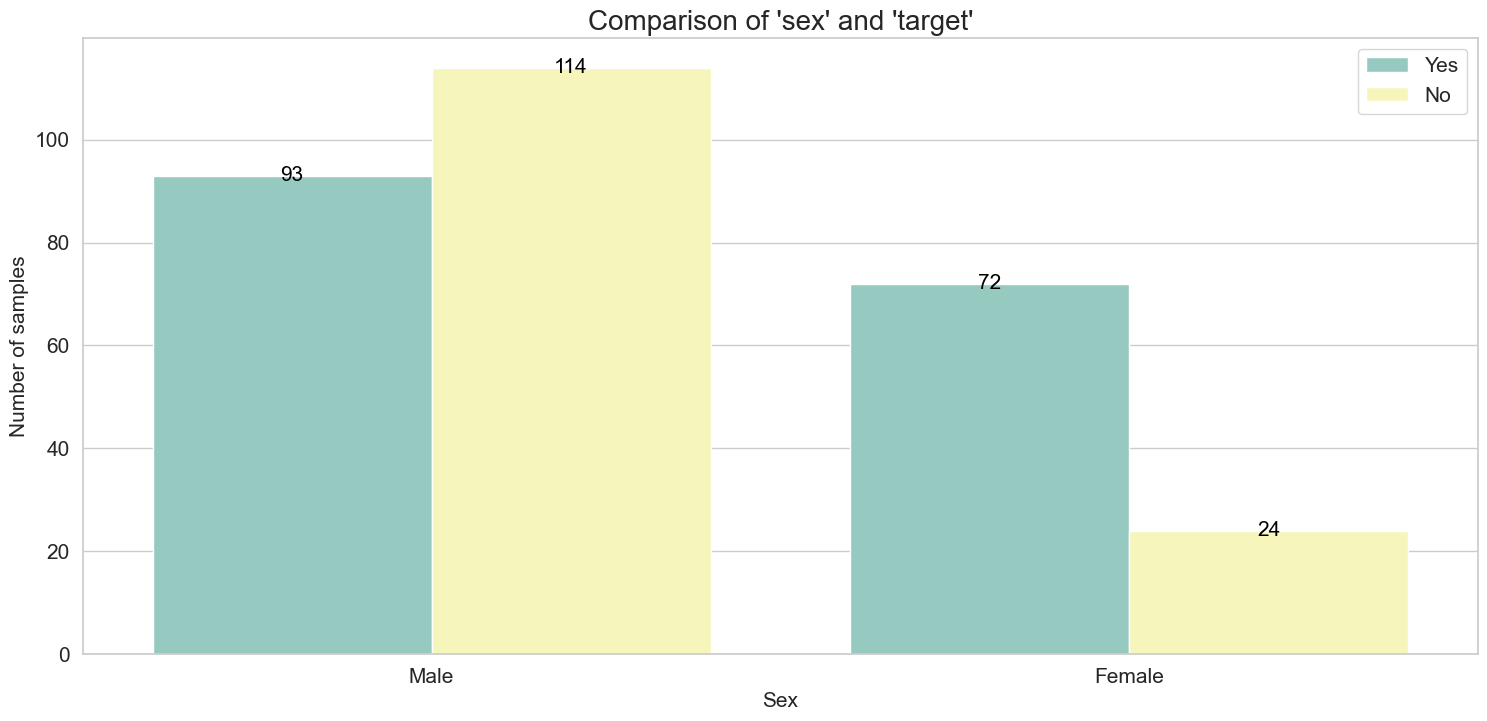

In [15]:
chart_df = df_copy[['sex', 'target']]
plt.figure(figsize=(18, 8))
sns.set(style="whitegrid")
sns.countplot(data=chart_df, x="sex", hue="target", palette="Set3")
ax = plt.gca()
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=15, color='black')
plt.title("Comparison of 'sex' and 'target'", fontsize=20)
plt.xlabel("Sex", fontsize=15)
plt.ylabel("Number of samples", fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(loc='upper right', fontsize=15)
plt.show()

In [16]:
df_copy.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,age_bins
0,63,Male,Asymptotic,145,233,1,0,150,0,2.3,0,0,1,Yes,61-65
1,37,Male,Non Anginal Pain,130,250,0,1,187,0,3.5,0,0,2,Yes,36-40
2,41,Female,Atypical Angina,130,204,0,0,172,0,1.4,2,0,2,Yes,41-45
3,56,Male,Atypical Angina,120,236,0,1,178,0,0.8,2,0,2,Yes,56-60
4,57,Female,Normal,120,354,0,1,163,1,0.6,2,0,2,Yes,56-60


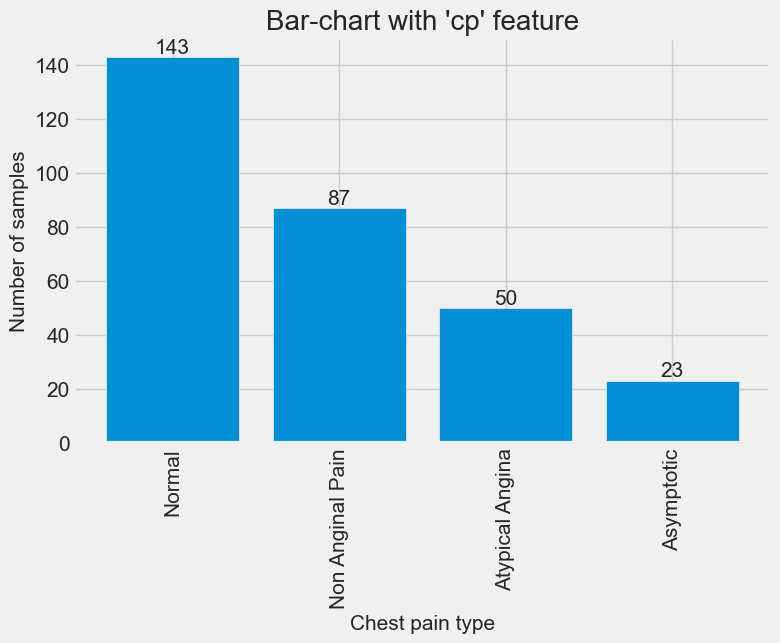

In [17]:
chart_data = dict(df_copy['cp'].value_counts())
with plt.style.context(style="fivethirtyeight"):
    plt.figure(figsize=(8,5))
    plt.rcParams['font.size'] = 15
    plt.bar(x=list(chart_data.keys()),
           height=list(chart_data.values()))
    plt.title(label="Bar-chart with 'cp' feature", fontsize=20)
    plt.xlabel(xlabel="Chest pain type", fontsize=15)
    plt.ylabel(ylabel="Number of samples", fontsize=15)
    plt.xticks(rotation=90, fontsize=15)
    plt.yticks(fontsize=15)
    for x, y in zip(chart_data.keys(), chart_data.values()):
        plt.text(x, y, str(y), ha='center', va='bottom')
    plt.show()

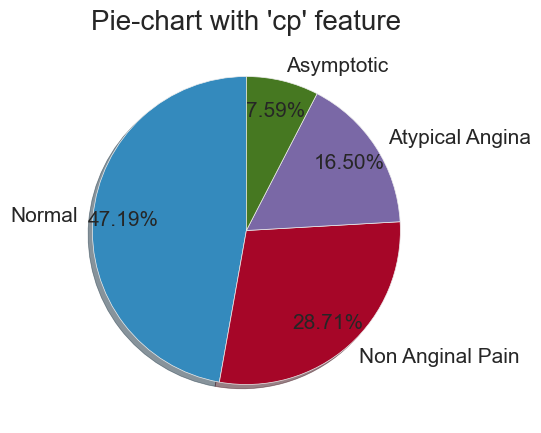

In [18]:
chart_data = dict(df_copy['cp'].value_counts())
with plt.style.context(style="bmh"):
    plt.figure(figsize=(8,5))
    plt.rcParams['font.size'] = 15
    label_props = {'fontsize': 15}
    plt.pie(x=list(chart_data.values()), 
            labels=list(chart_data.keys()), 
            autopct="%.2f%%",
            shadow=True, 
            startangle=90, 
            labeldistance=1.1, 
            textprops=label_props, 
            pctdistance=0.80)
    plt.title(label="Pie-chart with 'cp' feature", fontsize=20)
    plt.show()

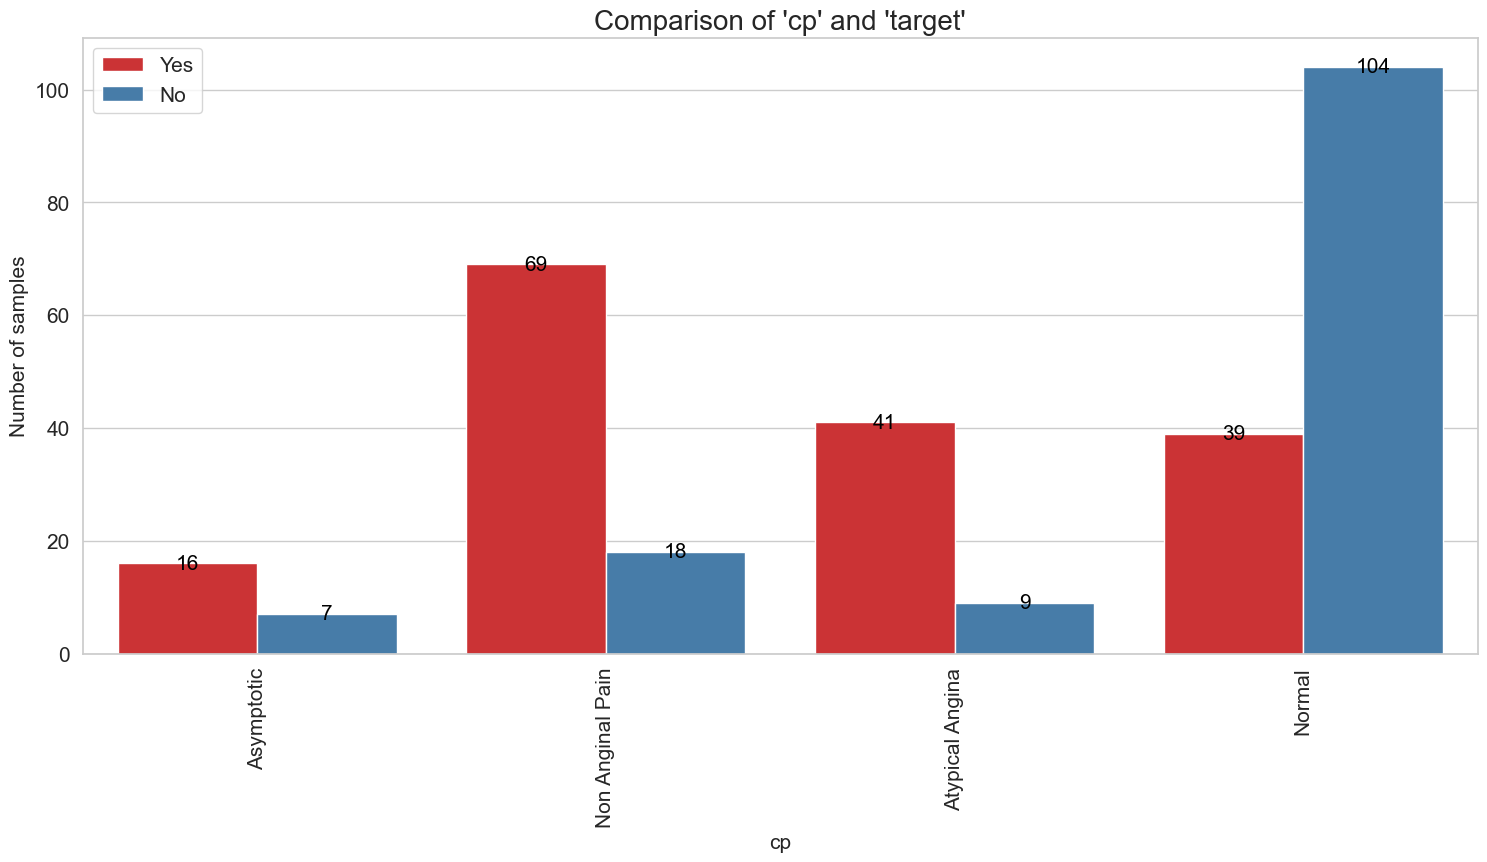

In [19]:
chart_df = df_copy[['cp', 'target']]
plt.figure(figsize=(18, 8))
plt.rcParams['font.size'] = 15
sns.set(style="whitegrid")
sns.countplot(data=chart_df, x="cp", hue="target", palette="Set1")
ax = plt.gca()
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=15, color='black')
plt.title("Comparison of 'cp' and 'target'", fontsize=20)
plt.xlabel("cp", fontsize=15)
plt.ylabel("Number of samples", fontsize=15)
plt.xticks(rotation=90, fontsize=15)
plt.yticks(fontsize=15)
plt.legend(loc='upper left', fontsize=15)
plt.show()

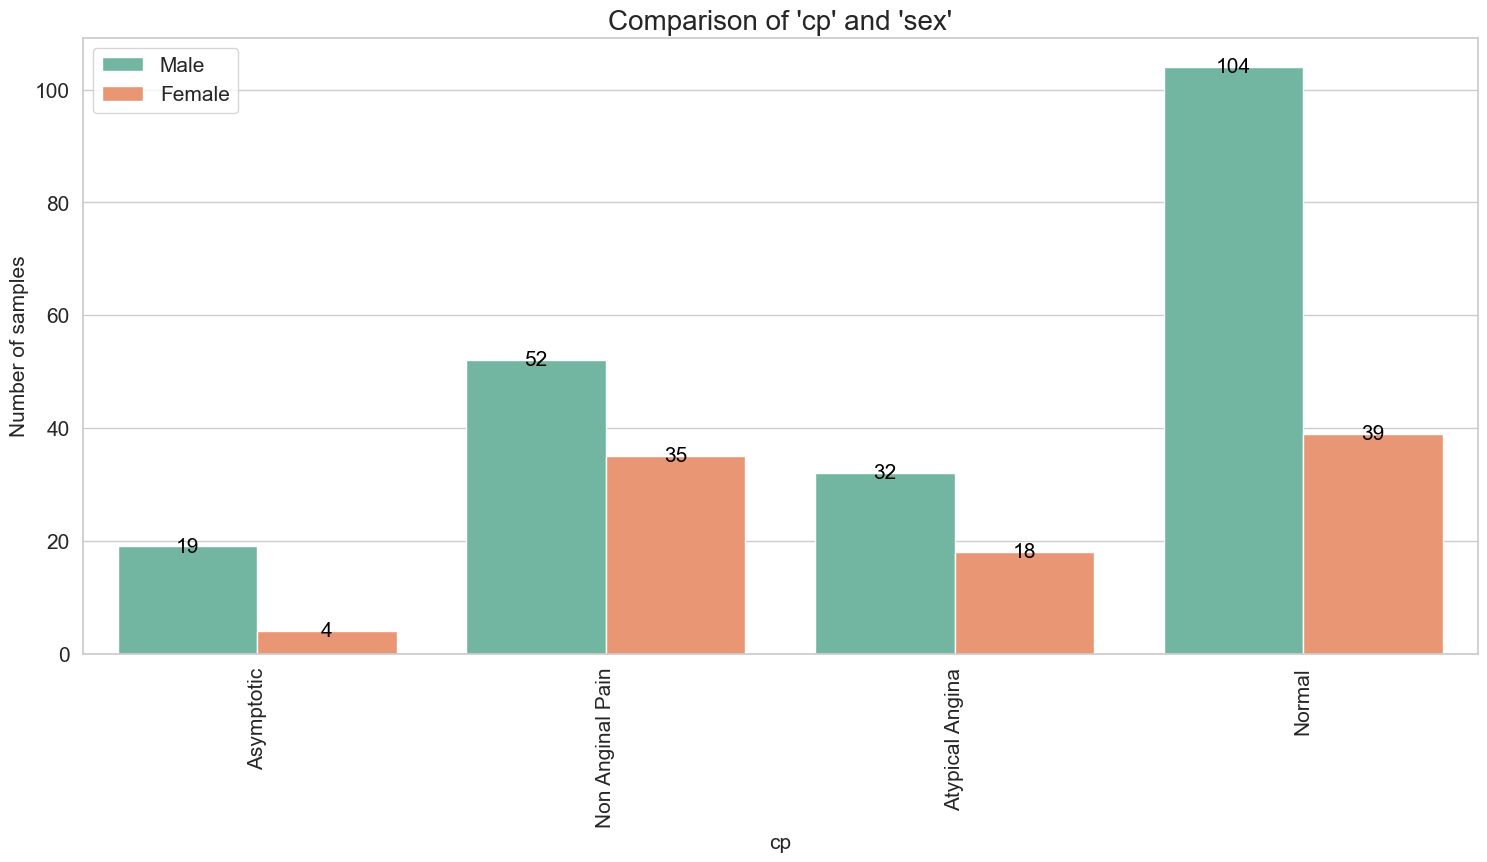

In [20]:
chart_df = df_copy[['cp', 'sex']]
plt.figure(figsize=(18, 8))
plt.rcParams['font.size'] = 15
sns.set(style="whitegrid")
sns.countplot(data=chart_df, x="cp", hue="sex", palette="Set2")
ax = plt.gca()
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=15, color='black')
plt.title("Comparison of 'cp' and 'sex'", fontsize=20)
plt.xlabel("cp", fontsize=15)
plt.ylabel("Number of samples", fontsize=15)
plt.xticks(rotation=90, fontsize=15)
plt.yticks(fontsize=15)
plt.legend(loc='upper left', fontsize=15)
plt.show()

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [77]:
target_feature = 'target'
all_features = df.columns.tolist()
all_features.remove(target_feature)
corr = df[all_features].corrwith(df[target_feature])

In [78]:
corr_df = pd.DataFrame(corr).reset_index()
corr_df.columns = ['Features', 'Importance']
corr_df['Importance'] = corr_df['Importance'].abs()
corr_df.head(10)

,Features,Importance
0,age,0.225619
1,sex,0.280937
2,cp,0.433798
3,trestbps,0.144931
4,chol,0.075993
5,fbs,0.028046
6,restecg,0.137230
7,thalach,0.421741
8,exang,0.436757
9,oldpeak,0.430696


In [79]:
corr_df.shape

(13, 2)

In [91]:
corr_df = corr_df.sort_values(by='Importance', ascending=False).reset_index(drop=True)
corr_df = corr_df.dropna()
corr_df = corr_df.loc[corr_df['Importance'] >= 0.1]
corr_df

,Features,Importance
0,ca,0.437045
1,exang,0.436757
2,cp,0.433798
3,oldpeak,0.430696
4,thalach,0.421741
5,slope,0.345877
6,thal,0.344029
7,sex,0.280937
8,age,0.225619
9,trestbps,0.144931


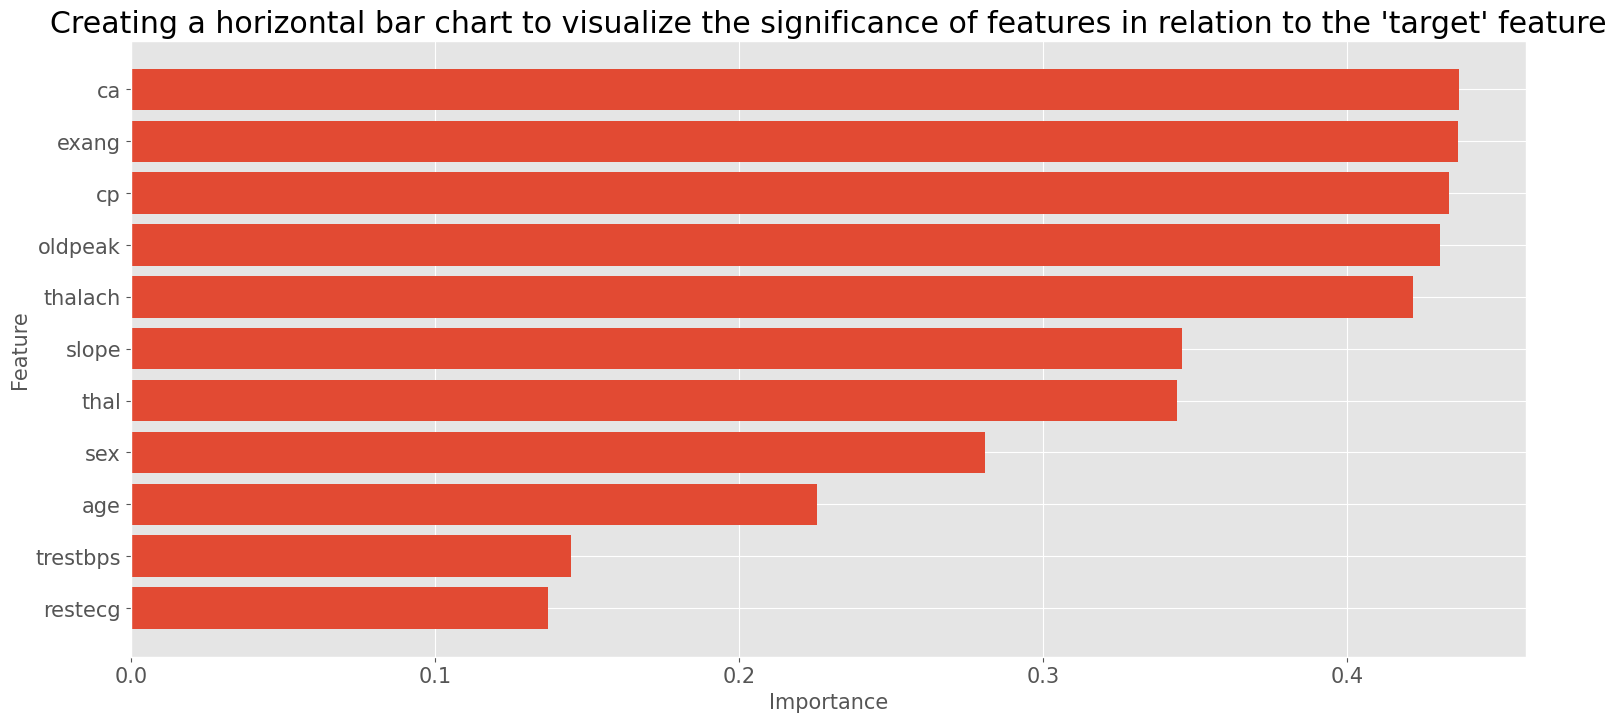

In [92]:
chart_corr_df = corr_df.sort_values(by='Importance').reset_index(drop=True)
chart_labels = chart_corr_df['Features'].values
chart_data = chart_corr_df['Importance'].values

with plt.style.context(style="ggplot"):
    plt.figure(figsize=(18,8))
    plt.rcParams['font.size'] = 15
    plt.barh(
        width=chart_data,
        y=chart_labels
    )
    plt.title(label="Creating a horizontal bar chart to visualize the significance of features in relation to the 'target' feature")
    plt.xlabel(xlabel='Importance', fontsize=15)
    plt.ylabel(ylabel='Feature', fontsize=15)
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    plt.show()

In [93]:
with open(file="models/selected_features.pkl", mode="wb") as file:
    pickle.dump(obj=corr_df['Features'].values.tolist(), file=file)

In [94]:
df.head()

,ca,exang,cp,oldpeak,thalach,slope,thal,sex,age,trestbps,restecg,target
0,0,0,3,2.3,150,0,1,1,63,145,0,1
1,0,0,2,3.5,187,0,2,1,37,130,1,1
2,0,0,1,1.4,172,2,2,0,41,130,0,1
3,0,0,1,0.8,178,2,2,1,56,120,1,1
4,0,1,0,0.6,163,2,2,0,57,120,1,1


In [95]:
df.shape

(303, 12)

In [96]:
df = df[corr_df['Features'].values.tolist() + ['target']]
df.head()

,ca,exang,cp,oldpeak,thalach,slope,thal,sex,age,trestbps,restecg,target
0,0,0,3,2.3,150,0,1,1,63,145,0,1
1,0,0,2,3.5,187,0,2,1,37,130,1,1
2,0,0,1,1.4,172,2,2,0,41,130,0,1
3,0,0,1,0.8,178,2,2,1,56,120,1,1
4,0,1,0,0.6,163,2,2,0,57,120,1,1


In [97]:
df.shape

(303, 12)

In [98]:
df['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

In [99]:
oversampled = []
for label in df['target'].unique():
    label_df = df.loc[df['target'] == label]
    oversampled_df = resample(label_df, n_samples=500)
    oversampled.append(oversampled_df)
    
df = pd.concat(objs=oversampled, ignore_index=True)
df = df.sample(frac=1).reset_index(drop=True)

df.head()

,ca,exang,cp,oldpeak,thalach,slope,thal,sex,age,trestbps,restecg,target
0,1,0,2,0.0,152,1,2,0,66,146,0,1
1,1,1,0,0.0,162,2,3,1,59,140,1,0
2,2,0,2,0.0,175,2,2,1,48,124,1,1
3,0,0,1,1.3,153,1,2,0,56,140,0,1
4,0,0,1,1.0,168,0,3,1,48,110,1,0


In [100]:
df['target'].value_counts()

1    500
0    500
Name: target, dtype: int64

In [101]:
X=df.drop(labels='target',axis=1)
X.head()

,ca,exang,cp,oldpeak,thalach,slope,thal,sex,age,trestbps,restecg
0,1,0,2,0.0,152,1,2,0,66,146,0
1,1,1,0,0.0,162,2,3,1,59,140,1
2,2,0,2,0.0,175,2,2,1,48,124,1
3,0,0,1,1.3,153,1,2,0,56,140,0
4,0,0,1,1.0,168,0,3,1,48,110,1


In [102]:
y=df[['target']]
y.head()

,target
0,1
1,0
2,1
3,1
4,0


# Data Splitting

In [103]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42,shuffle=True,stratify=y)
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(800, 11) (200, 11) (800, 1) (200, 1)


# Saving the splitted data

In [104]:
X_train.to_csv('train_test_data/X_train.csv',index=False)
X_test.to_csv('train_test_data/X_test.csv',index=False)
y_train.to_csv('train_test_data/y_train.csv',index=False)
y_test.to_csv('train_test_data/y_test.csv',index=False)

---